In [ ]:
!wget "https://github.com/sagihaider/CE888_2021/blob/main/Lab_8/data.zip?raw=true"

--2021-05-05 05:24:46--  https://github.com/sagihaider/CE888_2021/blob/main/Lab_8/data.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip [following]
--2021-05-05 05:24:47--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-05-05 05:24:47--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
from zipfile import ZipFile
file_name = "data.zip?raw=true"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os
base_dir = '/content/labels'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

human = '/content/data/Humans'
cats = '/content/data/cats'
dogs = '/content/data/dogs'
horses = '/content/data/horses'

In [ ]:

import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(cats, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(cats, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(cats, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(dogs, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(dogs, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(dogs, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(human, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(human, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(human, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(horses, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(horses, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(horses, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [ ]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label = word_label.split('-')[0]
    if word_label == 'dog': return 1
    elif word_label == 'horse': return 2
    elif word_label == 'rider': return 3
    elif word_label == 'cat': return 0

In [ ]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)


0
0
0
1
1
0
1
1
1
3
3
1
3
0
3
2
0
3
2
3
1
1
1
0
1
0
0
2
0
2
2
0
3
3
0
0
2
1
2
2
3
2
3
0
3
0
2
0
2
2
2
1
2
1
1
0
0
0
1
3
2
0
1
3
2
3
2
1
1
3
1
2
3
1
1
3
2
3
0
2
3
2
0
0
2
0
0
3
0
0
0
1
1
1
2
1
0
3
1
0
3
1
2
2
2
2
1
2
3
1
3
0
3
2
0
2
2
3
3
2
1
2
3
3
0
3
1
1
0
0
1
3
1
2
1
2
1
3
2
0
2
2
2
1
3
0
0
1
2
2
2
2
3
2
0
1
1
1
0
0
1
2
2
3
3
1
1
1
2
2
3
1
3
2
2
2
1
2
2
1
0
3
2
2
3
1
2
0
2
0
0
1
3
0
0
1
2
1
1
0
3
2
0
0
1
1
1
1
1
3
1
0
2
3
2
2
0
0
0
3
0
0
2
1
3
3
3
0
1
0
3
2
0
0
3
2
0
3
0
3
0
0
1
2
3
1
2
3
0
1
3
1
1
2
3
2
3
2
0
3
1
3
2
1
2
1
2
2
3
3
3
3
2
2
2
0
1
3
2
1
3
1
1
2
1
0
0
2
3
0
0
1
2
2
1
1
1
0
0
1
2
3
0
3
1
1
1
1
1
2
3
1
3
0
0
0
1
0
3
1
1
1
3
0
1
2
3
3
2
2
0
1
3
3
3
3
3
1
0
0
0
1
1
3
1
2
0
2
1
1
3
1
1
1
3
0
1
3
2
2
2
0
1
0
1
1
0
3
1
2
1
1
2
3
0
0
2
3
3
2
3
3
0
2
2
1
2
0
0
0
0
2
2
2
0
2
2
2
0
3
0
0
3
3
3
0
0
3
3
3
3
1
3
2
0
0
1
3
1
2
1
3
2
0
0
1
1
0
0
1
3
1
1
1
0
2
1
3
3
2
2
2
0
1
1
3
3
3
3
2
2
0
0
0
0
1
3
3
3
1
0
1
3
2
1
3
0
2
0
2
3
0
3
3
1
0
0
2
2
3
0
3
3
3
2
0
0
0
3
1
1
0
2
3
3
1
2
2
1
1


In [ ]:

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
last_layer = model.get_layer('predictions').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='DenseNet121_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                    batch_size=10,
                    epochs=20, 
                    validation_data=(val_X, val_y),
                    callbacks=my_callbacks)

Epoch 1/20
64/64 [==============================] - 46s 207ms/step - loss: 1.3866 - accuracy: 0.2557 - val_loss: 1.3827 - val_accuracy: 0.4762
Epoch 2/20
64/64 [==============================] - 9s 138ms/step - loss: 1.3820 - accuracy: 0.5068 - val_loss: 1.3782 - val_accuracy: 0.5595
Epoch 3/20
64/64 [==============================] - 9s 138ms/step - loss: 1.3764 - accuracy: 0.5746 - val_loss: 1.3737 - val_accuracy: 0.5952
Epoch 4/20
64/64 [==============================] - 9s 138ms/step - loss: 1.3729 - accuracy: 0.5897 - val_loss: 1.3693 - val_accuracy: 0.6071
Epoch 5/20
64/64 [==============================] - 9s 139ms/step - loss: 1.3684 - accuracy: 0.5920 - val_loss: 1.3649 - val_accuracy: 0.6071
Epoch 6/20
64/64 [==============================] - 9s 140ms/step - loss: 1.3638 - accuracy: 0.6173 - val_loss: 1.3605 - val_accuracy: 0.6429
Epoch 7/20
64/64 [==============================] - 9s 139ms/step - loss: 1.3587 - accuracy: 0.6298 - val_loss: 1.3562 - val_accuracy: 0.6310
Epoch

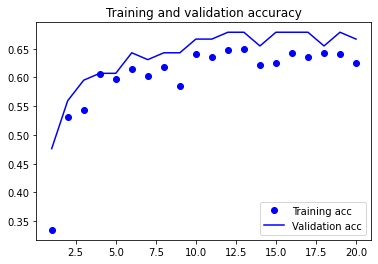

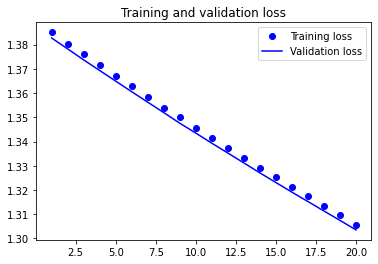

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:


## Test Accuracy
evaluate = model.evaluate(test_X, test_y)
predictions = model.predict(test_X)
print(predictions)
print(test_y)
evaluate


3/3 [==============================] - 17s 3s/step - loss: 1.2953 - accuracy: 0.6071
[[0.24965842 0.25485182 0.2608283  0.23466146]
 [0.24335796 0.2503006  0.27684706 0.22949441]
 [0.24530305 0.25763795 0.23191792 0.26514113]
 [0.24897592 0.24152023 0.2792161  0.23028776]
 [0.2502118  0.23391974 0.20896068 0.3069078 ]
 [0.24681792 0.24164964 0.3024025  0.2091299 ]
 [0.26268685 0.24578476 0.21319413 0.2783343 ]
 [0.24557471 0.2472381  0.24990506 0.25728214]
 [0.22637397 0.23766884 0.33095095 0.20500623]
 [0.2343263  0.25831136 0.29087025 0.21649215]
 [0.25313467 0.24664839 0.22342737 0.27678955]
 [0.2359107  0.24865717 0.28570253 0.22972956]
 [0.2491338  0.2523404  0.23017098 0.26835477]
 [0.25114238 0.24649508 0.25717393 0.24518862]
 [0.2701648  0.24474286 0.2532844  0.23180795]
 [0.2516908  0.23688972 0.22056393 0.2908555 ]
 [0.23983602 0.2500408  0.2602345  0.24988869]
 [0.27358535 0.26055875 0.24084526 0.22501062]
 [0.22935797 0.29809755 0.2978508  0.17469366]
 [0.261137   0.2777361

[1.2953040599822998, 0.6071428656578064]